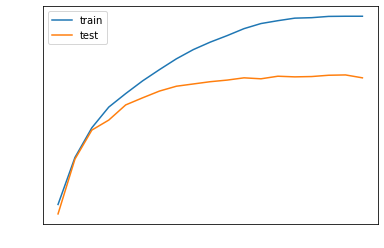

In [1]:
#kütüphaneleri import
from sklearn.ensemble \
    import RandomForestClassifier

from sklearn.datasets \
    import make_classification

from sklearn.model_selection \
    import train_test_split

from sklearn.metrics import \
    accuracy_score

import matplotlib.pyplot as plt

#sınıflandırma verisi oluşturma
X, y = make_classification(n_samples=10000, 
                n_features=20, 
                n_informative=5,
                 n_redundant=15,
                  random_state=1)

#train ve test verilerini ayırma
X_train, X_test, y_train, y_test = \
    train_test_split(
    X, y, test_size=0.33, random_state=0)

#overfit yapmak için max_depth parametreleri
max_depth_param = range(1,20,1)

#train ve test accuracy'leri için boş listeler
test_acc = []
train_acc = []

#her max_depth parametresi için döngü
for i in max_depth_param:
    #model oluşturalım
    rf = RandomForestClassifier(max_depth=i)

    #modeli eğitelim
    rf.fit(X_train, y_train)

    #train seti için tahminler
    y_pred_train = rf.predict(X_train)

    #tahminleri accuracy listesine ekleme
    train_acc.append(accuracy_score(y_train,
                             y_pred_train))

    #test seti için tahminler
    y_pred_test = rf.predict(X_test)

    #tahminleri accuracy listesine ekleme
    test_acc.append(accuracy_score(y_test, 
                                y_pred_test))

#öğrenme eğrisini çizme
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(max_depth_param, 
    train_acc, 
    label ="train")

ax.plot(max_depth_param, 
    test_acc, 
    label="test")


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.legend()
plt.show()


In [ ]:
#gördüğünüz gibi bir yerden sonra
#test ve train accuracy'leri birbirinden
#ayrılıyor. bu durum aşırı öğrenme yani
#overfit durumu.

#izlediğiniz için teşekkürler